In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import pandas as pd
from statsmodels.sandbox.stats.multicomp import multipletests


%matplotlib inline



In [4]:
data = pd.read_csv('hw6t3v1.txt', header = None, sep='\s+')
data.head()


,0,1
0,7152.5,8630.8
1,5942.3,7531.9
2,6879.0,8943.6
3,5565.8,7313.8
4,6947.2,8664.6


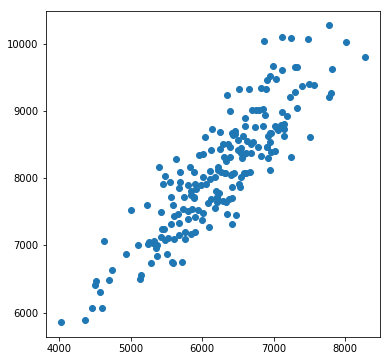

In [8]:
x1 = data.values[:,0]
x2 = data.values[:,1]
plt.figure(figsize=(6,6))
plt.scatter(x1, x2)
plt.show()


In [23]:
def mult(x1, x2, alpha = 0.01, method='holm'):
    p_val = np.zeros(4)
    observed = np.histogram2d(x1, x2, bins=[len(np.unique(x1)), len(np.unique(x2))])[0]
    observed += np.ones(observed.shape)
    depend = sps.chi2_contingency(observed)[1]
    p_val[1] = sps.shapiro(x1)[1]
    p_val[2] = sps.shapiro(x2)[1]
    if (depend < alpha / 4):
        p_val[0] = 1 - depend
        p_val[3] = sps.wilcoxon(x1, x2)[1]
        return multipletests(p_val, alpha=alpha, method=method)
    else:
        p_val[0] = depend
        p_val[3] = sps.ranksums(x1, x2)[1]
        return multipletests(p_val, alpha=alpha, method=method)
        
    

In [24]:
mult(x1, x2)




(array([False, False, False,  True], dtype=bool),
 array([  1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.11128718e-52]),
 0.002509430066318874,
 0.0025)

In [30]:
def mult_upgrade(x1, x2, alpha = 0.01, method='holm'):
    p_val = np.zeros(4)
    observed = np.histogram2d(x1, x2, bins=[len(np.unique(x1)), len(np.unique(x2))])[0]
    observed += np.ones(observed.shape)
    depend = sps.chi2_contingency(observed)[1]
    p_val[1] = sps.shapiro(x1)[1]
    p_val[2] = sps.shapiro(x2)[1]
    if (depend < alpha / 4):
        p_val[0] = 1 - depend
        if (p_val[1] < alpha / 3) and (p_val[2] < alpha / 2):
            p_val[1] = 1 - p_val[1]
            p_val[2] = 1 - p_val[2]
            p_val[3] = sps.ttest_rel(x1,x2)[1]
            return multipletests(p_val, alpha=alpha, method=method)
        else:    
            p_val[3] = sps.wilcoxon(x1, x2)[1]
            return multipletests(p_val, alpha=alpha, method=method)
    else:
        p_val[0] = depend
        if (p_val[1] < alpha / 3) and (p_val[2] < alpha / 2):
            p_val[1] = 1 - p_val[1]
            p_val[2] = 1 - p_val[2]
            p_val[3] = sps.ttest_ind(x1,x2)[1]
            return multipletests(p_val, alpha=alpha, method=method)
        else:    
            p_val[3] = sps.ranksums(x1, x2)[1]
            return multipletests(p_val, alpha=alpha, method=method)
        
    

In [31]:
mult_upgrade(x1, x2)



(array([False, False, False,  True], dtype=bool),
 array([  1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.11128718e-52]),
 0.002509430066318874,
 0.0025)

То есть гипотеза об отсутствии сдвига отвергается